# Deep Learning In Python

## Table Of Content

1. Head First into Deep Learning
        1.1 The Course Overview
        1.2 What Is Deep Learning
        1.3 Open Source Libraries for Deep Learning
        1.4 Deep Learning "Hello World!" Classifying the MNIST Data 

2. Backpropagation and Theano for the Rescue
        2.1 Introduction to Backpropagation
        2.2 Understanding Deep Learning with Theano
        2.3 Optimizing a Simple Model in Pure Theano

3. Keras  Making Theano Even Easier to Use
        3.1 Keras Behind the Scenes.mp4
        3.2 Fully Connected or Dense Layers.
        3.3 Convolutional and Pooling Layers
    
4. Solving Cats Versus Dogs
        4.1 Large Scale Datasets, ImageNet, and Very Deep Neural Networks
        4.2 Loading Pre-trained Models with Theano
        4.3 Reusing Pre-trained Models in New Applications

5. "for" Loops and Recurrent Neural Networks in Theano
        5.1 Theano for Loops  the scan Module
        5.2 Recurrent Layers
        5.3 Recurrent Versus Convolutional Layers
        5.4 Recurrent Networks Training a Sentiment Analysis Model for Text

6. Bonus Challenge and TensorFlow
        6.1 Bonus Challenge  Automatic Image Captioning
        6.2 Captioning TensorFlow  Googles Machine Learning Library
        
## Prerequisites 

* Python
* Calculus and linear algebra

## Section 1 : Head First into Deep Learning

### 1.1 The Course Overview

<img src="NN.png" alt="Neural Network" width="70%" Height="70%" align="left"/>
<img src="NN1.png" alt="Neural Network" width="70%" Height="70%" align="left"/>

### 1.2 What is Deep Learning?

<img src="NN2.png" alt="Neural Network" width="70%" Height="70%" align="left"/>

### 1.3 Open Source Libraries for Deep Learning

#### Desired Features of Deep Learning Framework 

* Covers the main architectures (fully connected, convolutional, and recurrent) 
* Flexible and fast prototyping 
* Compile to run on GPU 

#### Deep Learning Libraries and Python APIs

* Caffe
* Keras
* Theano
* TensorFlow
* Lasagne
* Blocks
* Neon
* Chainer

### 1.4 Deep Learning "Hello World!" Classifying the MNIST Data

#### Environment Set Up

* Download and install Anaconda Python distribution for free from [here](http://docs.continuum.io/anaconda/install)
* Update Theano 
    * Command line:
        * `conda uninstall Theano`
        * `pip install Theano`

    * Learn how to configure Theano [here](http://deeplearning.net/software/theano/library/config.html)
* Install Keras 
    * Command line:
        * `conda uninstall Keras`
        * `pip install Keras`

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

#### Load Dataset

In [15]:
batch_size = 128
nb_classes = 10   # 10 digits from 0-9

# input image dimensions
img_rows, img_cols = 28, 28

# The data, shuffled and split between train and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshapes data
x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Converts class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print("One hot encoding : {}".format(y_train[0, :]))

x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples
One hot encoding : [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


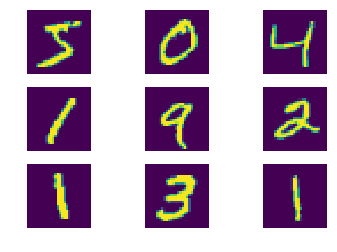

In [16]:
# first 9 image samples from dataset

for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(x_train[i, 0])
    plt.axis("off")

### Model Definition

<img src="ModelDefinition.png" alt="model definition" align="left" />

In [20]:
# Building a Sequential Model

model = Sequential()

model.add(Conv2D(6, (5, 5), input_shape=(1,img_rows,img_cols)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(120,(5, 5)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('relu'))

ValueError: Negative dimension size caused by subtracting 5 from 1 for 'conv2d_5/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [5,5,28,6].